# Suicídio no Brasil entre os anos de 2014 e 2018

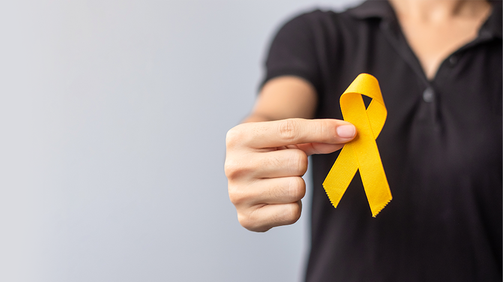

O suicídio é uma ocorrência complexa, influenciada por fatores psicológicos, biológicos, sociais e culturais. Segundo dados da Organização Mundial da Saúde, mais de 700 mil pessoas morrem por ano devido ao suicídio, o que representa uma a cada 100 mortes registradas.


Ainda de acordo com a OMS, as taxas mundiais de suicídio estão diminuindo, mas na região das Américas os números vêm crescendo. Entre 2000 e 2019, a taxa global diminuiu 36%. No mesmo período, nas Américas, as taxas aumentaram 17%.


## Importação da base e das biblios

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as sts
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
df = pd.read_csv('/content/drive/MyDrive/PYTHON/PROJETOS/Suicídio no Brasil 2014 a 2018/datasus_suicidio_2014_2018.csv', encoding='latin-1')
df.head(3)

,estado,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes
0,AC,2014,Suicídio,02-01-14,02-07-77,Masculino,Preta,Casado,4 a 7 anos,ATLETA PROFISSIONAL DE FUTEBOL,Rio Branco,Domicílio,Não,X700,X700,37.0,1
1,AC,2014,Suicídio,23-01-14,30-07-66,Masculino,Branca,União consensual,12 e mais,MEDICO GINECOLOGISTA E OBSTETRA,Rio Branco,Domicílio,Não,X800,X800,48.0,1
2,AC,2014,Suicídio,31-01-14,28-07-43,Masculino,Branca,NaN,NaN,0,Rio Branco,Domicílio,Não,X700,X700,71.0,1


[O grupo entre X60 e X84 compreende lesões autoprovocadas intencionalmente](https://cid.ninsaude.com/capitulo/xx/x60-x84/)

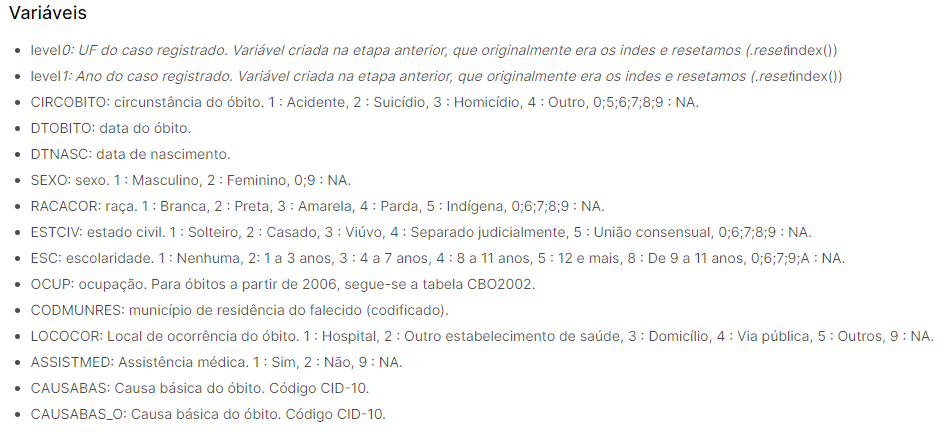

## Conhecendo a base

In [4]:
df.shape

(58634, 17)

In [5]:
# df.info()

In [6]:
df.value_counts('SEXO')

SEXO
Masculino    46169
Feminino     12450
dtype: int64

In [7]:
df.agg(
    {'ano' : ['min', 'max'],
     'idade' : ['min', 'max']
     }
)

,ano,idade
min,2014,0.0
max,2018,113.0


In [8]:
df.columns

Index(['estado', 'ano', 'CIRCOBITO', 'DTOBITO', 'DTNASC', 'SEXO', 'RACACOR',
       'ESTCIV', 'ESC', 'OCUP', 'CODMUNRES', 'LOCOCOR', 'ASSISTMED',
       'CAUSABAS', 'CAUSABAS_O', 'idade', 'mes'],
      dtype='object')

In [9]:
df['CIRCOBITO'].unique()

array(['Suicídio', 'Acidente', nan, 'Homicídio', 'Outro'], dtype=object)

In [10]:
df['SEXO'].unique()

array(['Masculino', 'Feminino', nan], dtype=object)

In [11]:
df['RACACOR'].unique()

array(['Preta', 'Branca', 'Parda', nan, 'Indígena', 'Amarela'],
      dtype=object)

In [12]:
df['ESTCIV'].unique()

array(['Casado', 'União consensual', nan, 'Solteiro', 'Viúvo',
       'Separado judicialmente'], dtype=object)

In [13]:
df['ESC'].unique()

array(['4 a 7 anos', '12 e mais', nan, '8 a 11 anos', '1 a 3 anos',
       'Nenhuma'], dtype=object)

In [14]:
df['LOCOCOR'].unique()

array(['Domicílio', 'Outros', 'Hospital', 'Via pública',
       'Outro estabelecimento de saúde', nan, '6'], dtype=object)

In [15]:
# Quantidade de Ocupações

df['OCUP'].nunique()

1108

In [16]:
df['CAUSABAS'].nunique()

301

In [17]:
df['CAUSABAS_O'].nunique()

527

## Filtrando apenas SUICÍDIO

In [18]:
suic = (
    df
    .query('CIRCOBITO == "Suicídio"'))

In [19]:
suic.tail(3)

,estado,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes
58631,TO,2018,Suicídio,15-05-18,08-08-55,Feminino,Parda,Viúvo,Nenhuma,DONA DE CASA,Palmas,Hospital,Sim,X699,R99,63.0,5
58632,TO,2018,Suicídio,24-07-18,27-06-01,Masculino,Parda,Solteiro,8 a 11 anos,ESTUDANTE,Araguaína,Outros,Não,X700,X700,17.0,7
58633,TO,2018,Suicídio,28-12-18,17-07-76,Masculino,Preta,União consensual,Nenhuma,0,Natividade,Domicílio,Não,X700,X700,42.0,12


### Conhecendo a base filtrada

In [20]:
suic.shape

(55484, 17)

In [21]:
# # Alterando o zero p/ NaN
# suic['OCUP'] = suic['OCUP'].replace('0', np.nan)

In [22]:
# % de NULL

(suic.isnull().sum() / suic.shape[0]) * 100

estado         0.000000
ano            0.000000
CIRCOBITO      0.000000
DTOBITO        0.000000
DTNASC         0.374883
SEXO           0.025232
RACACOR        2.218658
ESTCIV         7.295797
ESC           23.093144
OCUP           0.000000
CODMUNRES      0.000000
LOCOCOR        0.264941
ASSISTMED     29.226444
CAUSABAS       0.000000
CAUSABAS_O     0.136976
idade          0.374883
mes            0.000000
dtype: float64

In [23]:
# Maiores frequências de ocorrência:

print(sts.mode(suic['RACACOR']))
print(sts.mode(suic['SEXO']))
print(sts.mode(suic['ESTCIV']))
print(sts.mode(suic['ASSISTMED']))
print(sts.mode(suic['idade']))
print(sts.mode(suic['ESC']))
print(sts.mode(suic['LOCOCOR']))
print(sts.mode(suic['OCUP']))

Branca
Masculino
Solteiro
Não
33.0
8 a 11 anos
Domicílio
0


### Tratando Missing

In [24]:
# Substituindo alguns Missing pelo dado mais frequente

suic['RACACOR'].fillna('Branca', inplace = True)
suic['ESTCIV'].fillna('Solteiro', inplace = True)

suic['ESC'].fillna('8 a 11 anos', inplace = True)   # 23% missing
suic['ASSISTMED'].fillna('Não', inplace = True)     # 29% missing

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [25]:
# Retirando os demais missing

suic.dropna(inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [26]:
# % de NULL pós tratamento

(suic.isnull().sum() / suic.shape[0]) * 100

estado        0.0
ano           0.0
CIRCOBITO     0.0
DTOBITO       0.0
DTNASC        0.0
SEXO          0.0
RACACOR       0.0
ESTCIV        0.0
ESC           0.0
OCUP          0.0
CODMUNRES     0.0
LOCOCOR       0.0
ASSISTMED     0.0
CAUSABAS      0.0
CAUSABAS_O    0.0
idade         0.0
mes           0.0
dtype: float64

In [27]:
# Tamanho da base pós tratamento
suic.shape

(55057, 17)

### Números relevantes

In [28]:
# % das Ocupações

suic.OCUP.value_counts(1)

0                                              0.206731
APOSENTADO/PENSIONISTA                         0.072725
ESTUDANTE                                      0.072543
DONA DE CASA                                   0.051347
TRABALHADOR AGROPECUARIO EM GERAL              0.049149
                                                 ...   
AUXILIAR DE SEGUROS                            0.000018
MONTADOR DE INSTRUMENTOS DE PRECISAO           0.000018
PROGRAMADOR VISUAL GRAFICO                     0.000018
TECNICO DE GARANTIA DA QUALIDADE               0.000018
GERENTE DE PESQUISA E DESENVOLVIMENTO (P&D)    0.000018
Name: OCUP, Length: 1093, dtype: float64

In [29]:
# % de Suicídio por Sexo

suic.SEXO.value_counts(1) * 100

Masculino    78.691175
Feminino     21.308825
Name: SEXO, dtype: float64

In [30]:
# % de Suicídio por Raça

suic.RACACOR.value_counts(1) * 100

Branca      52.489238
Parda       40.926676
Preta        5.114699
Indígena     1.066168
Amarela      0.403218
Name: RACACOR, dtype: float64

In [31]:
# % de Suicídio por Estado Civil

suic.ESTCIV.value_counts(1) * 100

Solteiro                  57.039069
Casado                    26.715949
Separado judicialmente     7.159853
União consensual           5.361716
Viúvo                      3.723414
Name: ESTCIV, dtype: float64

In [32]:
# % de Suicídio - se teve ou não Assistência

suic.ASSISTMED.value_counts(1) * 100

Não    86.210654
Sim    13.789346
Name: ASSISTMED, dtype: float64

In [33]:
# % de Suicídio por Escolaridade

suic.ESC.value_counts(1) * 100

8 a 11 anos    47.619740
4 a 7 anos     24.718020
1 a 3 anos     13.694898
12 e mais       9.493797
Nenhuma         4.473546
Name: ESC, dtype: float64

In [34]:
# % de Suicídio po Local de Ocorrência

suic.LOCOCOR.value_counts(1) * 100

Domicílio                         62.903900
Outros                            15.745500
Hospital                          13.985506
Via pública                        5.808526
Outro estabelecimento de saúde     1.545671
6                                  0.010898
Name: LOCOCOR, dtype: float64

In [35]:
suic['idade'].nunique()

100

In [36]:
# Visão Geral por Estado

suic_estado = (
    suic
    .groupby('estado')
    .agg(
        qtd_suicidio = ('CIRCOBITO', 'count'))
    .sort_values('qtd_suicidio', ascending=False)
)
suic_estado.head(7)

,qtd_suicidio
estado,
SP,10098
MG,6609
RS,5959
PR,3642
SC,3226
CE,2856
RJ,2824


In [37]:
# Visão Geral por Município

suic_municipio = (
    suic
    .groupby('CODMUNRES')
    .agg(
        qtd_suicidio = ('CIRCOBITO', 'count'))
    .sort_values('qtd_suicidio', ascending=False)
)
suic_municipio.head(7)

,qtd_suicidio
CODMUNRES,
São Paulo,1444
Rio de Janeiro,1144
Brasília,758
Belo Horizonte,722
Fortaleza,696
Manaus,519
Porto Alegre,505


In [38]:
# Visão Geral por Ano

suic_ano = (
    suic
    .groupby('ano')
    .agg(
        qtd_suicidio = ('CIRCOBITO', 'count'))
)
suic_ano.head()

,qtd_suicidio
ano,
2014,10121
2015,10427
2016,10607
2017,11731
2018,12171


In [39]:
# Visão Geral por Sexo

suic_sexo = (
    suic
    .groupby(by=['ano', 'SEXO'])
    .agg(
        qtd_suicidio = ('CIRCOBITO', 'count'))
).reset_index()

suic_sexo.head()

,ano,SEXO,qtd_suicidio
0,2014,Feminino,2149
1,2014,Masculino,7972
2,2015,Feminino,2252
3,2015,Masculino,8175
4,2016,Feminino,2221


In [40]:
suic.tail(1)

,estado,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes
58633,TO,2018,Suicídio,28-12-18,17-07-76,Masculino,Preta,União consensual,Nenhuma,0,Natividade,Domicílio,Não,X700,X700,42.0,12


### VIZ

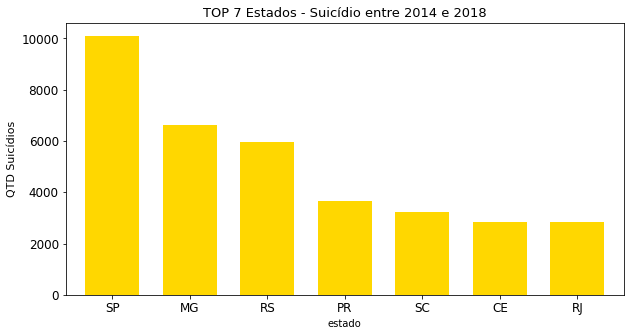

In [86]:
# TOP 7 Estados - Suicídio entre 2014 e 2018

suic_estado = suic.groupby('estado')['CIRCOBITO'].size().sort_values(ascending = False).head(7)
plt.figure(figsize = ((10, 5)))

suic_estado.plot.bar('estado', width = 0.7, linewidth = 11, color='gold')
plt.xticks(rotation=0)
plt.ylabel('QTD Suicídios', fontsize = 11)
plt.title('TOP 7 Estados - Suicídio entre 2014 e 2018', fontsize = 13)
plt.tick_params(labelsize=12);

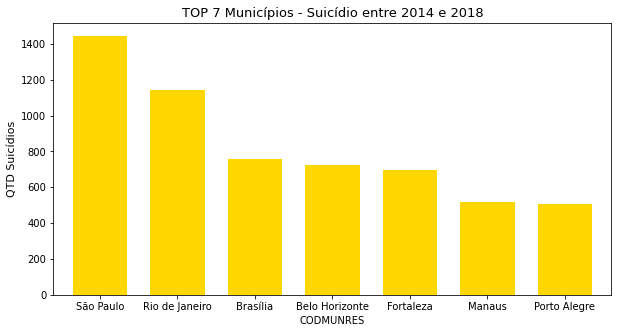

In [42]:
# TOP 7 Municípios - Suicídio entre 2014 e 2018

suic_municipio = suic.groupby('CODMUNRES')['CIRCOBITO'].size().sort_values(ascending = False).head(7)
plt.figure(figsize = ((10, 5)))

suic_municipio.plot.bar('CODMUNRES', width = 0.7, linewidth = 11, color='gold')
plt.xticks(rotation=0)
plt.ylabel('QTD Suicídios', fontsize = 11)
plt.title('TOP 7 Municípios - Suicídio entre 2014 e 2018', fontsize = 13);

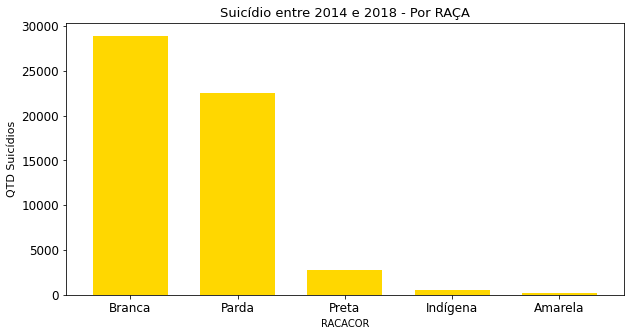

In [85]:
# RAÇAS - Suicídio entre 2014 e 2018

suic_raca = suic.groupby('RACACOR')['CIRCOBITO'].size().sort_values(ascending = False)
plt.figure(figsize = ((10, 5)))

suic_raca.plot.bar('RACACOR', width = 0.7, linewidth = 11, color='gold')
plt.xticks(rotation=0)
plt.ylabel('QTD Suicídios', fontsize = 11)
plt.title('Suicídio entre 2014 e 2018 - Por RAÇA', fontsize = 13)
plt.tick_params(labelsize=12);

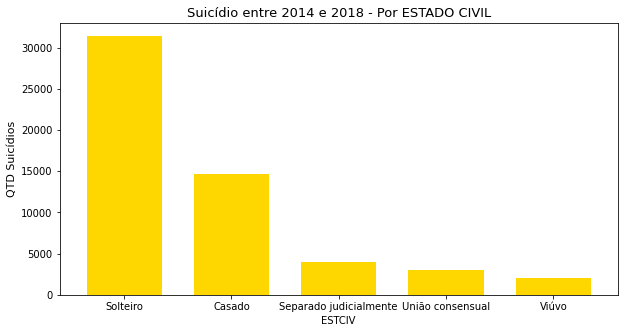

In [84]:
# ESTADO CIVIL - Suicídio entre 2014 e 2018

suic_estciv = suic.groupby('ESTCIV')['CIRCOBITO'].size().sort_values(ascending = False)
plt.figure(figsize = ((10, 5)))

suic_estciv.plot.bar('ESTCIV', width = 0.7, linewidth = 11, color='gold')
plt.xticks(rotation=0)
plt.ylabel('QTD Suicídios', fontsize = 11)
plt.title('Suicídio entre 2014 e 2018 - Por ESTADO CIVIL', fontsize = 13)
plt.tick_params(labelsize=10);

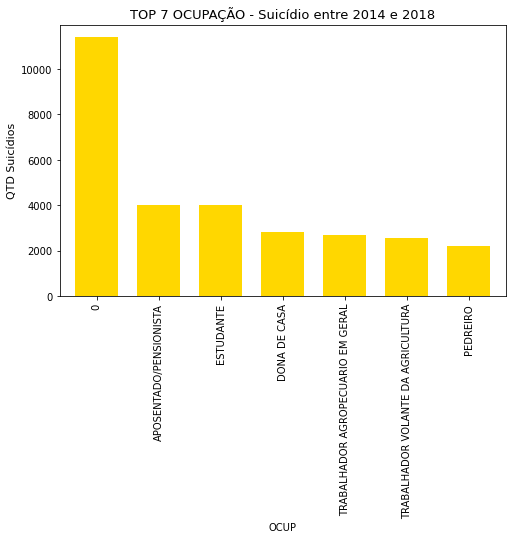

In [45]:
# TOP 7 Ocupação - Suicídio entre 2014 e 2018

suic_ocup = suic.groupby('OCUP')['CIRCOBITO'].size().sort_values(ascending = False).head(7)
plt.figure(figsize = ((8, 5)))

suic_ocup.plot.bar('OCUP', width = 0.7, linewidth = 11, color='gold')
plt.xticks(rotation=90)
plt.ylabel('QTD Suicídios', fontsize = 11)
plt.title('TOP 7 OCUPAÇÃO - Suicídio entre 2014 e 2018', fontsize = 13);

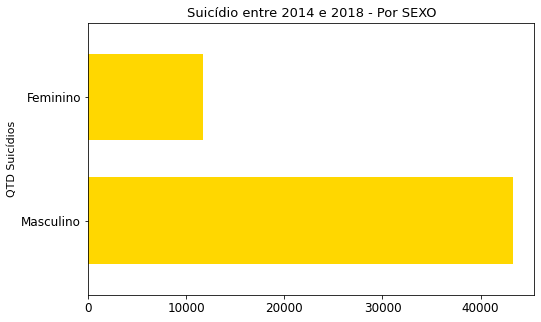

In [81]:
# SEXO - Suicídio entre 2014 e 2018

suic_sexo = suic.groupby('SEXO')['CIRCOBITO'].size().sort_values(ascending = False)
plt.figure(figsize = ((8, 5)))

suic_sexo.plot.barh('SEXO', width = 0.7, linewidth = 11, color='gold')
plt.xticks(rotation=0)
plt.ylabel('QTD Suicídios', fontsize = 11)
plt.title('Suicídio entre 2014 e 2018 - Por SEXO', fontsize = 13)
plt.tick_params(labelsize=12);

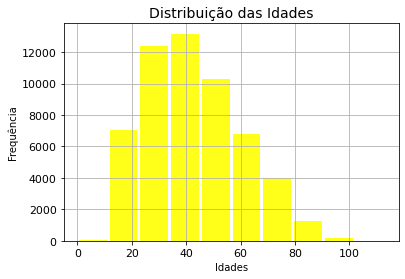

In [172]:
# Distribuição das Idades

suic.hist('idade', bins=10, rwidth=0.9, color='yellow', alpha=0.9)

plt.title('Distribuição das Idades', fontsize=14)
plt.xlabel('Idades')
plt.ylabel('Frequência')
plt.tick_params(labelsize=11);

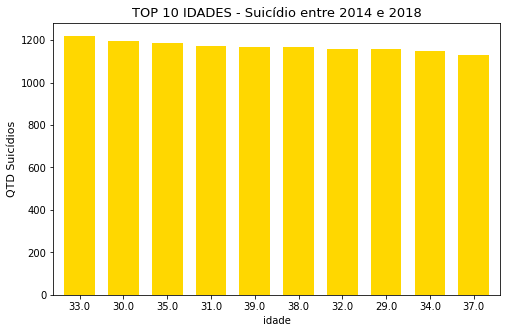

In [48]:
# TOP 10 Idades - Suicídio entre 2014 e 2018

suic_idade = suic.groupby('idade')['CIRCOBITO'].size().sort_values(ascending = False).head(10)
plt.figure(figsize = ((8, 5)))

suic_idade.plot.bar('idade', width = 0.7, linewidth = 11, color='gold')
plt.xticks(rotation=0)
plt.ylabel('QTD Suicídios', fontsize = 11)
plt.title('TOP 10 IDADES - Suicídio entre 2014 e 2018', fontsize = 13);

### Infos sobre População e Região

In [135]:
# População por Ano

pop_brasil = pd.read_csv('/content/drive/MyDrive/FIA/TCC/bases/brasil.csv')
pop_brasil.tail(3)

,ano,populacao
28,2019,210147125
29,2020,211755692
30,2021,213317639


In [50]:
# Infos sobre Regiões do País

info_regioes = pd.read_excel('/content/drive/MyDrive/FIA/TCC/bases/info_regioes.xlsx')
info_regioes.head(3)

,sigla,estado,capital,regiao,cod_estado
0,AC,ACRE,RIO BRANCO,NORTE,12
1,PA,PARÁ,BELÉM,NORTE,15
2,RO,RONDÔNIA,PORTO VELHO,NORTE,11


In [51]:
# Trazendo a Região de cada Estado

suic_regiao_geral = (
    suic
    .merge(info_regioes, left_on="estado", right_on="sigla", how="left")
    .filter([
        'estado', 'ano', 'CIRCOBITO', 'DTOBITO', 'DTNASC', 'SEXO', 'RACACOR', 'ESTCIV', 'ESC', 'OCUP', 'CODMUNRES', 'LOCOCOR', 'ASSISTMED',
       'CAUSABAS', 'CAUSABAS_O', 'idade', 'mes', 'regiao'])
    )

suic_regiao_geral.head(3)

,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes,regiao
0,2014,Suicídio,02-01-14,02-07-77,Masculino,Preta,Casado,4 a 7 anos,ATLETA PROFISSIONAL DE FUTEBOL,Rio Branco,Domicílio,Não,X700,X700,37.0,1,NORTE
1,2014,Suicídio,23-01-14,30-07-66,Masculino,Branca,União consensual,12 e mais,MEDICO GINECOLOGISTA E OBSTETRA,Rio Branco,Domicílio,Não,X800,X800,48.0,1,NORTE
2,2014,Suicídio,31-01-14,28-07-43,Masculino,Branca,Solteiro,8 a 11 anos,0,Rio Branco,Domicílio,Não,X700,X700,71.0,1,NORTE


In [52]:
# Detalhe por Região

suic_regiao = (
    suic_regiao_geral
    .groupby('regiao')
    .agg(
        qtd_suicidio = ('CIRCOBITO', 'count'))
    .sort_values('qtd_suicidio', ascending=False)
)
suic_regiao.head(7)

,qtd_suicidio
regiao,
SUDESTE,20478
SUL,12827
NORDESTE,12727
CENTRO_OESTE,5072
NORTE,3953


In [53]:
suic_sudeste = (
    suic_regiao_geral
    .query('regiao == "SUDESTE"'))
suic_sudeste.tail(1)

,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes,regiao
54802,2018,Suicídio,11-12-18,24-05-68,Masculino,Branca,Solteiro,12 e mais,MOTORISTA DE ONIBUS URBANO,Bauru,Domicílio,Não,X700,X700,50.0,12,SUDESTE


In [54]:
suic_sul = (
    suic_regiao_geral
    .query('regiao == "SUL"'))
suic_sul.tail(1)

,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes,regiao
52683,2018,Suicídio,30-12-18,11-08-88,Feminino,Branca,Solteiro,1 a 3 anos,ATENDENTE COMERCIAL (AGENCIA POSTAL),Porto Belo,Outros,Sim,X649,X649,30.0,12,SUL


In [55]:
suic_nordeste = (
    suic_regiao_geral
    .query('regiao == "NORDESTE"'))
suic_nordeste.tail(1)

,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes,regiao
54935,2018,Suicídio,29-12-18,08-03-52,Masculino,Parda,Viúvo,1 a 3 anos,PEDREIRO,Aracaju,Domicílio,Não,X700,X700,66.0,12,NORDESTE


In [56]:
suic_centro_oeste = (
    suic_regiao_geral
    .query('regiao == "CENTRO_OESTE"'))
suic_centro_oeste.tail(1)

,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes,regiao
46174,2018,Suicídio,21-11-18,07-08-77,Masculino,Branca,Casado,8 a 11 anos,MARCENEIRO,Campo Grande,Outros,Não,X704,X704,41.0,11,CENTRO_OESTE


In [57]:
suic_norte = (
    suic_regiao_geral
    .query('regiao == "NORTE"'))
suic_norte.tail(1)

,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes,regiao
55056,2018,Suicídio,28-12-18,17-07-76,Masculino,Preta,União consensual,Nenhuma,0,Natividade,Domicílio,Não,X700,X700,42.0,12,NORTE


#### Detalhe por Região

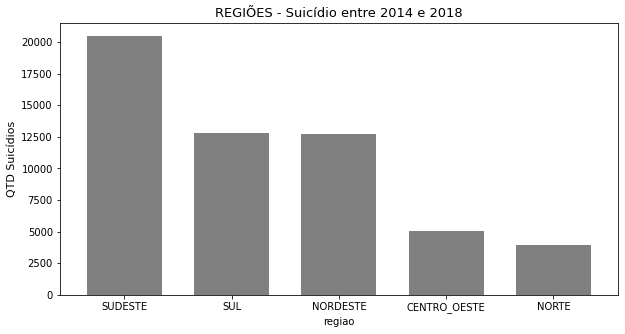

In [58]:
# Abertura por Região

suic_regiao_plot = suic_regiao_geral.groupby('regiao')['CIRCOBITO'].size().sort_values(ascending = False)
plt.figure(figsize = ((10, 5)))

suic_regiao_plot.plot.bar('regiao', width = 0.7, linewidth = 11, color='gray')
plt.xticks(rotation=0)
plt.ylabel('QTD Suicídios', fontsize = 11)
plt.title('REGIÕES - Suicídio entre 2014 e 2018', fontsize = 13);

#### SUDESTE

In [146]:
suic_sudeste_sexo = suic_sudeste.groupby('SEXO')['CIRCOBITO'].size().sort_values(ascending = False)
suic_sudeste_raca = suic_sudeste.groupby('RACACOR')['CIRCOBITO'].size().sort_values(ascending = False)
suic_sudeste_estciv = suic_sudeste.groupby('ESTCIV')['CIRCOBITO'].size().sort_values(ascending = False)
suic_sudeste_ocup = suic_sudeste.groupby('OCUP')['CIRCOBITO'].size().sort_values(ascending = False).head(7)
suic_sudeste_esc = suic_sudeste.groupby('ESC')['CIRCOBITO'].size().sort_values(ascending = False)

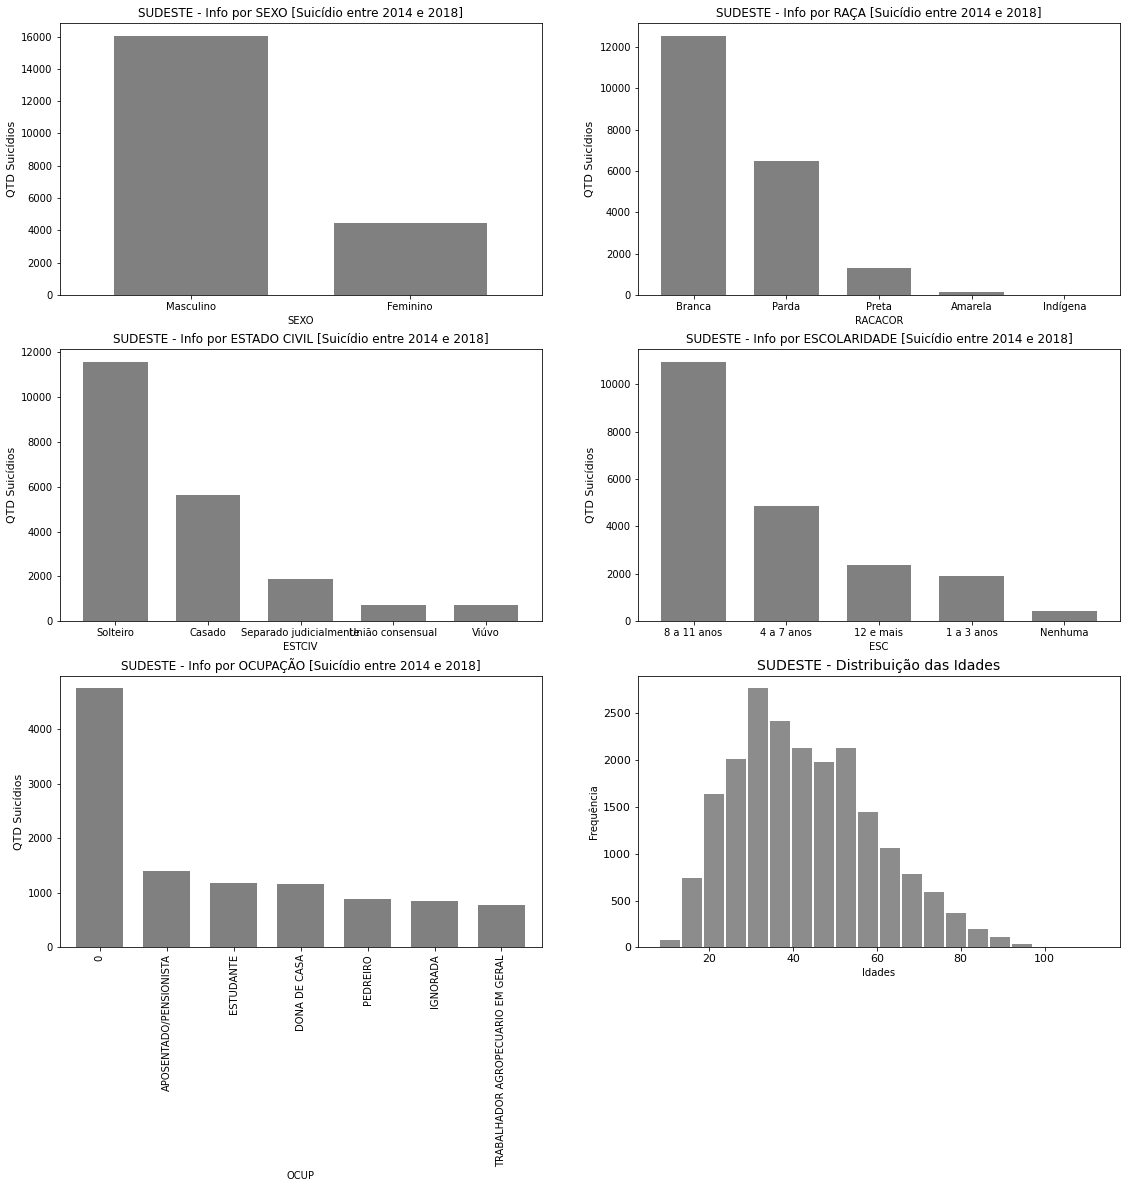

In [160]:
fig, ax = plt.subplots(figsize=(19, 17))

plt.subplot(321)
suic_sudeste_sexo.plot.bar('SEXO', width = 0.7, linewidth = 11, color='gray')
plt.xticks(rotation=0)
plt.ylabel('QTD Suicídios', fontsize = 11)
plt.title('SUDESTE - Info por SEXO [Suicídio entre 2014 e 2018]', fontsize = 12)

plt.subplot(322)
suic_sudeste_raca.plot.bar('RACACOR', width = 0.7, linewidth = 11, color='gray')
plt.xticks(rotation=0)
plt.ylabel('QTD Suicídios', fontsize = 11)
plt.title('SUDESTE - Info por RAÇA [Suicídio entre 2014 e 2018]', fontsize = 12)

plt.subplot(323)
suic_sudeste_estciv.plot.bar('ESTCIV', width = 0.7, linewidth = 11, color='gray')
plt.xticks(rotation=0)
plt.ylabel('QTD Suicídios', fontsize = 11)
plt.title('SUDESTE - Info por ESTADO CIVIL [Suicídio entre 2014 e 2018]', fontsize = 12)

plt.subplot(324)
suic_sudeste_esc.plot.bar('ESC', width = 0.7, linewidth = 11, color='gray')
plt.xticks(rotation=0)
plt.ylabel('QTD Suicídios', fontsize = 11)
plt.title('SUDESTE - Info por ESCOLARIDADE [Suicídio entre 2014 e 2018]', fontsize = 12)

plt.subplot(325)
suic_sudeste_ocup.plot.bar('OCUP', width = 0.7, linewidth = 11, color='gray')
plt.xticks(rotation=90)
plt.ylabel('QTD Suicídios', fontsize = 11)
plt.title('SUDESTE - Info por OCUPAÇÃO [Suicídio entre 2014 e 2018]', fontsize = 12)

plt.subplot(326)
plt.hist(suic_sudeste['idade'], bins=20, rwidth=0.9, color='gray', alpha=0.9)
plt.title('SUDESTE - Distribuição das Idades', fontsize=14)
plt.xlabel('Idades')
plt.ylabel('Frequência')
plt.tick_params(labelsize=11)

plt.show();

#### SUL

In [161]:
suic_sul_sexo = suic_sul.groupby('SEXO')['CIRCOBITO'].size().sort_values(ascending = False)
suic_sul_raca = suic_sul.groupby('RACACOR')['CIRCOBITO'].size().sort_values(ascending = False)
suic_sul_estciv = suic_sul.groupby('ESTCIV')['CIRCOBITO'].size().sort_values(ascending = False)
suic_sul_esc = suic_sul.groupby('ESC')['CIRCOBITO'].size().sort_values(ascending = False)
suic_sul_ocup = suic_sul.groupby('OCUP')['CIRCOBITO'].size().sort_values(ascending = False).head(7)

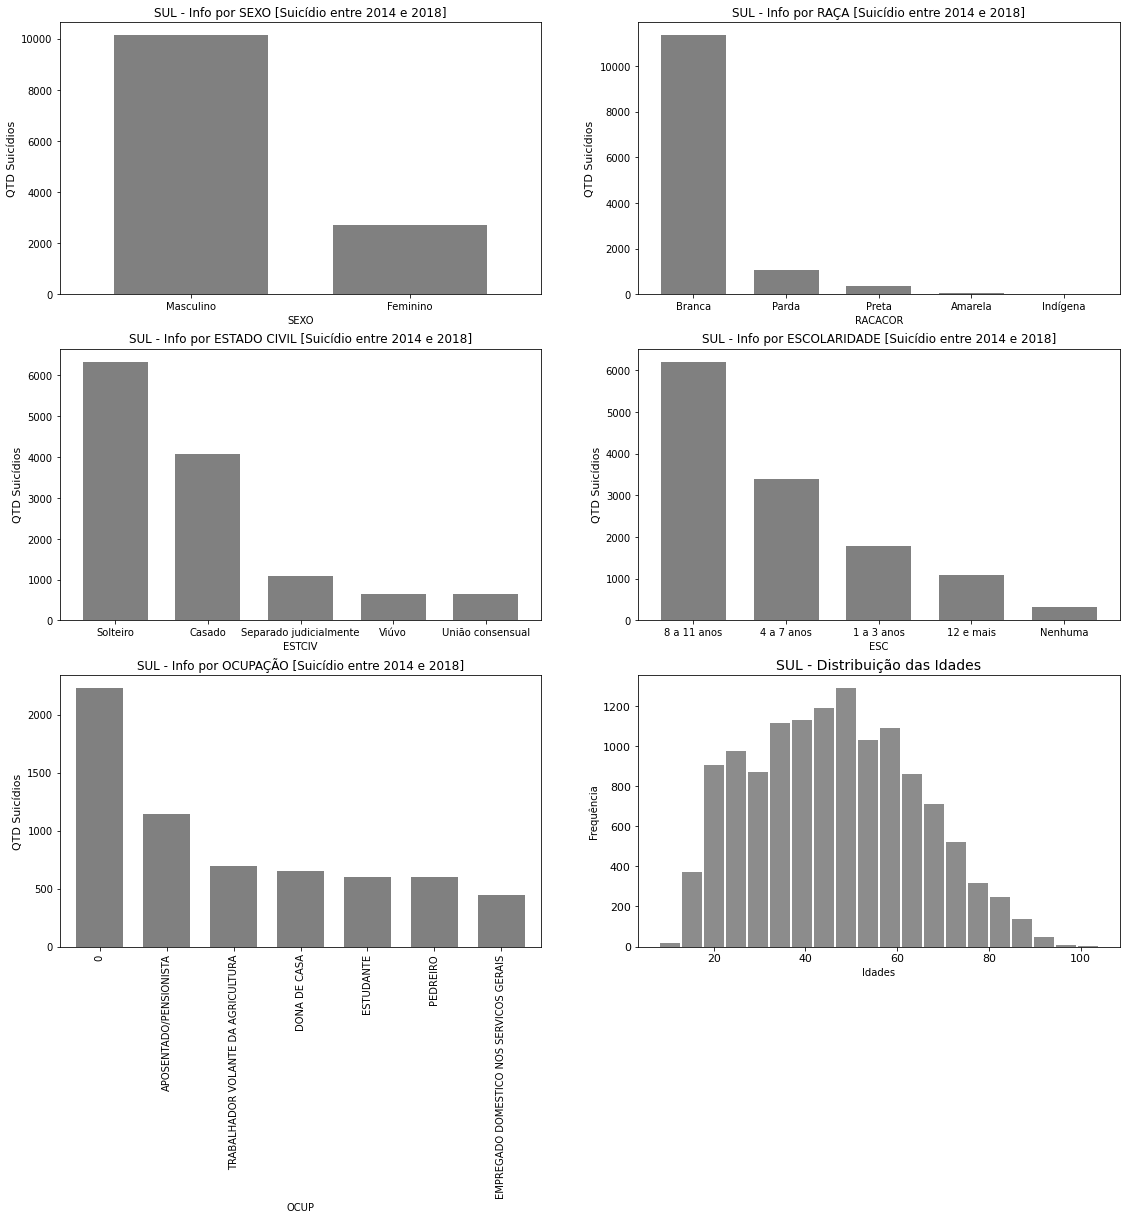

In [166]:
fig, ax = plt.subplots(figsize=(19, 17))

plt.subplot(321)
suic_sul_sexo.plot.bar('SEXO', width = 0.7, linewidth = 11, color='gray')
plt.xticks(rotation=0)
plt.ylabel('QTD Suicídios', fontsize = 11)
plt.title('SUL - Info por SEXO [Suicídio entre 2014 e 2018]', fontsize = 12)

plt.subplot(322)
suic_sul_raca.plot.bar('RACACOR', width = 0.7, linewidth = 11, color='gray')
plt.xticks(rotation=0)
plt.ylabel('QTD Suicídios', fontsize = 11)
plt.title('SUL - Info por RAÇA [Suicídio entre 2014 e 2018]', fontsize = 12)

plt.subplot(323)
suic_sul_estciv.plot.bar('ESTCIV', width = 0.7, linewidth = 11, color='gray')
plt.xticks(rotation=0)
plt.ylabel('QTD Suicídios', fontsize = 11)
plt.title('SUL - Info por ESTADO CIVIL [Suicídio entre 2014 e 2018]', fontsize = 12)

plt.subplot(324)
suic_sul_esc.plot.bar('ESC', width = 0.7, linewidth = 11, color='gray')
plt.xticks(rotation=0)
plt.ylabel('QTD Suicídios', fontsize = 11)
plt.title('SUL - Info por ESCOLARIDADE [Suicídio entre 2014 e 2018]', fontsize = 12)

plt.subplot(325)
suic_sul_ocup.plot.bar('OCUP', width = 0.7, linewidth = 11, color='gray')
plt.xticks(rotation=90)
plt.ylabel('QTD Suicídios', fontsize = 11)
plt.title('SUL - Info por OCUPAÇÃO [Suicídio entre 2014 e 2018]', fontsize = 12)

plt.subplot(326)
plt.hist(suic_sul['idade'], bins=20, rwidth=0.9, color='gray', alpha=0.9)
plt.title('SUL - Distribuição das Idades', fontsize=14)
plt.xlabel('Idades')
plt.ylabel('Frequência')
plt.tick_params(labelsize=11)

plt.show();

#### NORDESTE

In [167]:
suic_nordeste_sexo = suic_nordeste.groupby('SEXO')['CIRCOBITO'].size().sort_values(ascending = False)
suic_nordeste_raca = suic_nordeste.groupby('RACACOR')['CIRCOBITO'].size().sort_values(ascending = False)
suic_nordeste_estciv = suic_nordeste.groupby('ESTCIV')['CIRCOBITO'].size().sort_values(ascending = False)
suic_nordeste_esc = suic_nordeste.groupby('ESC')['CIRCOBITO'].size().sort_values(ascending = False)
suic_nordeste_ocup = suic_nordeste.groupby('OCUP')['CIRCOBITO'].size().sort_values(ascending = False).head(7)

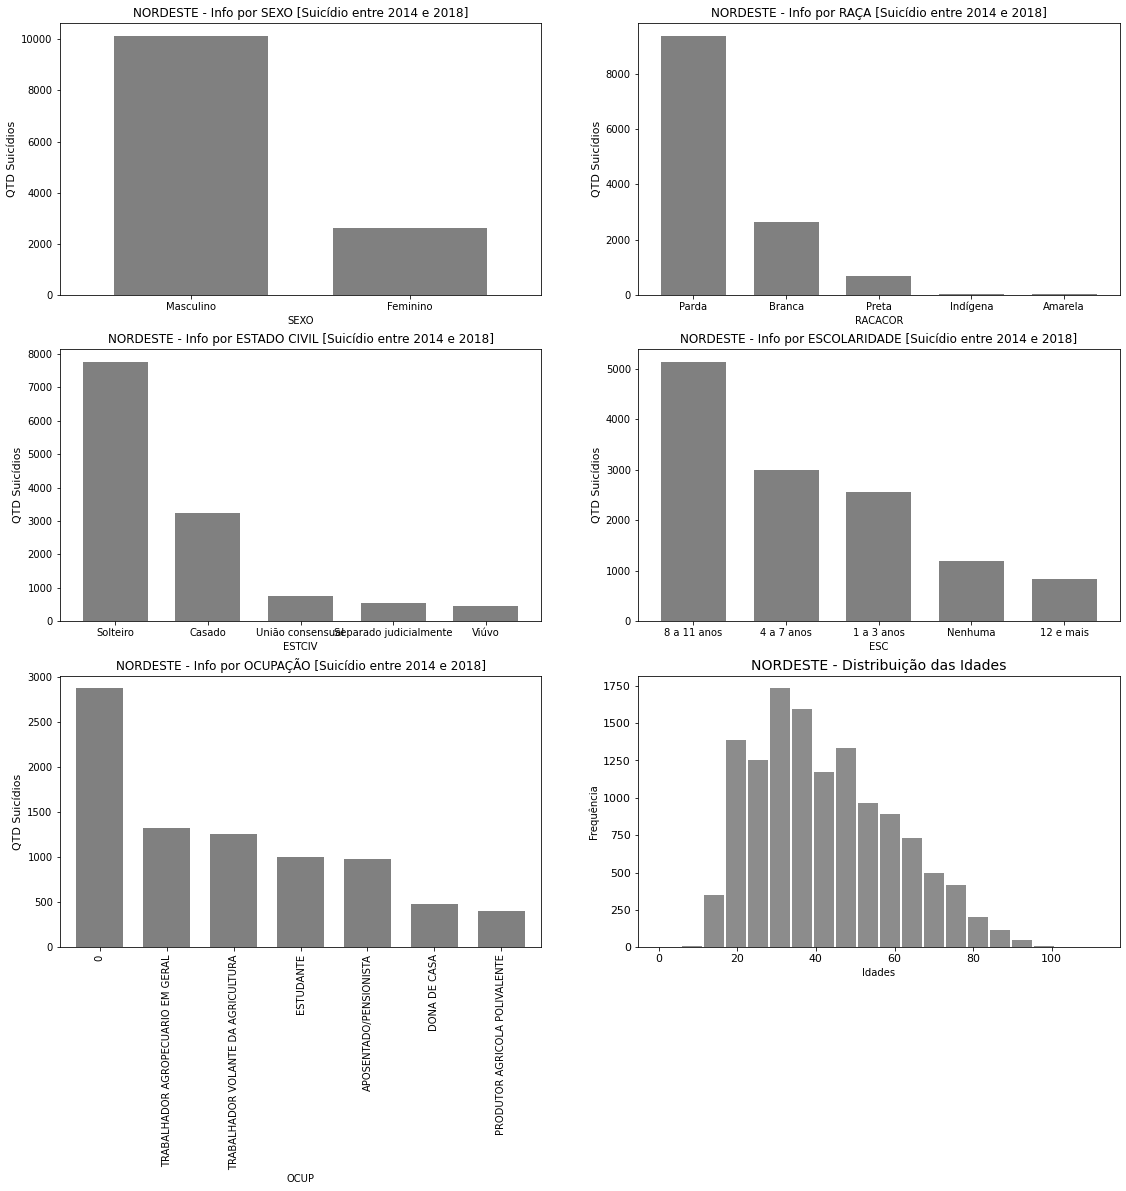

In [168]:
fig, ax = plt.subplots(figsize=(19, 17))

plt.subplot(321)
suic_nordeste_sexo.plot.bar('SEXO', width = 0.7, linewidth = 11, color='gray')
plt.xticks(rotation=0)
plt.ylabel('QTD Suicídios', fontsize = 11)
plt.title('NORDESTE - Info por SEXO [Suicídio entre 2014 e 2018]', fontsize = 12)

plt.subplot(322)
suic_nordeste_raca.plot.bar('RACACOR', width = 0.7, linewidth = 11, color='gray')
plt.xticks(rotation=0)
plt.ylabel('QTD Suicídios', fontsize = 11)
plt.title('NORDESTE - Info por RAÇA [Suicídio entre 2014 e 2018]', fontsize = 12)

plt.subplot(323)
suic_nordeste_estciv.plot.bar('ESTCIV', width = 0.7, linewidth = 11, color='gray')
plt.xticks(rotation=0)
plt.ylabel('QTD Suicídios', fontsize = 11)
plt.title('NORDESTE - Info por ESTADO CIVIL [Suicídio entre 2014 e 2018]', fontsize = 12)

plt.subplot(324)
suic_nordeste_esc.plot.bar('ESC', width = 0.7, linewidth = 11, color='gray')
plt.xticks(rotation=0)
plt.ylabel('QTD Suicídios', fontsize = 11)
plt.title('NORDESTE - Info por ESCOLARIDADE [Suicídio entre 2014 e 2018]', fontsize = 12)

plt.subplot(325)
suic_nordeste_ocup.plot.bar('OCUP', width = 0.7, linewidth = 11, color='gray')
plt.xticks(rotation=90)
plt.ylabel('QTD Suicídios', fontsize = 11)
plt.title('NORDESTE - Info por OCUPAÇÃO [Suicídio entre 2014 e 2018]', fontsize = 12)

plt.subplot(326)
plt.hist(suic_nordeste['idade'], bins=20, rwidth=0.9, color='gray', alpha=0.9)
plt.title('NORDESTE - Distribuição das Idades', fontsize=14)
plt.xlabel('Idades')
plt.ylabel('Frequência')
plt.tick_params(labelsize=11)

plt.show();

#### CENTRO-OESTE

In [164]:
suic_centro_oeste_sexo = suic_centro_oeste.groupby('SEXO')['CIRCOBITO'].size().sort_values(ascending = False)
suic_centro_oeste_raca = suic_sul.groupby('RACACOR')['CIRCOBITO'].size().sort_values(ascending = False)
suic_centro_oeste_estciv = suic_sul.groupby('ESTCIV')['CIRCOBITO'].size().sort_values(ascending = False)
suic_centro_oeste_esc = suic_sul.groupby('ESC')['CIRCOBITO'].size().sort_values(ascending = False)
suic_centro_oeste_ocup = suic_sul.groupby('OCUP')['CIRCOBITO'].size().sort_values(ascending = False).head(7)

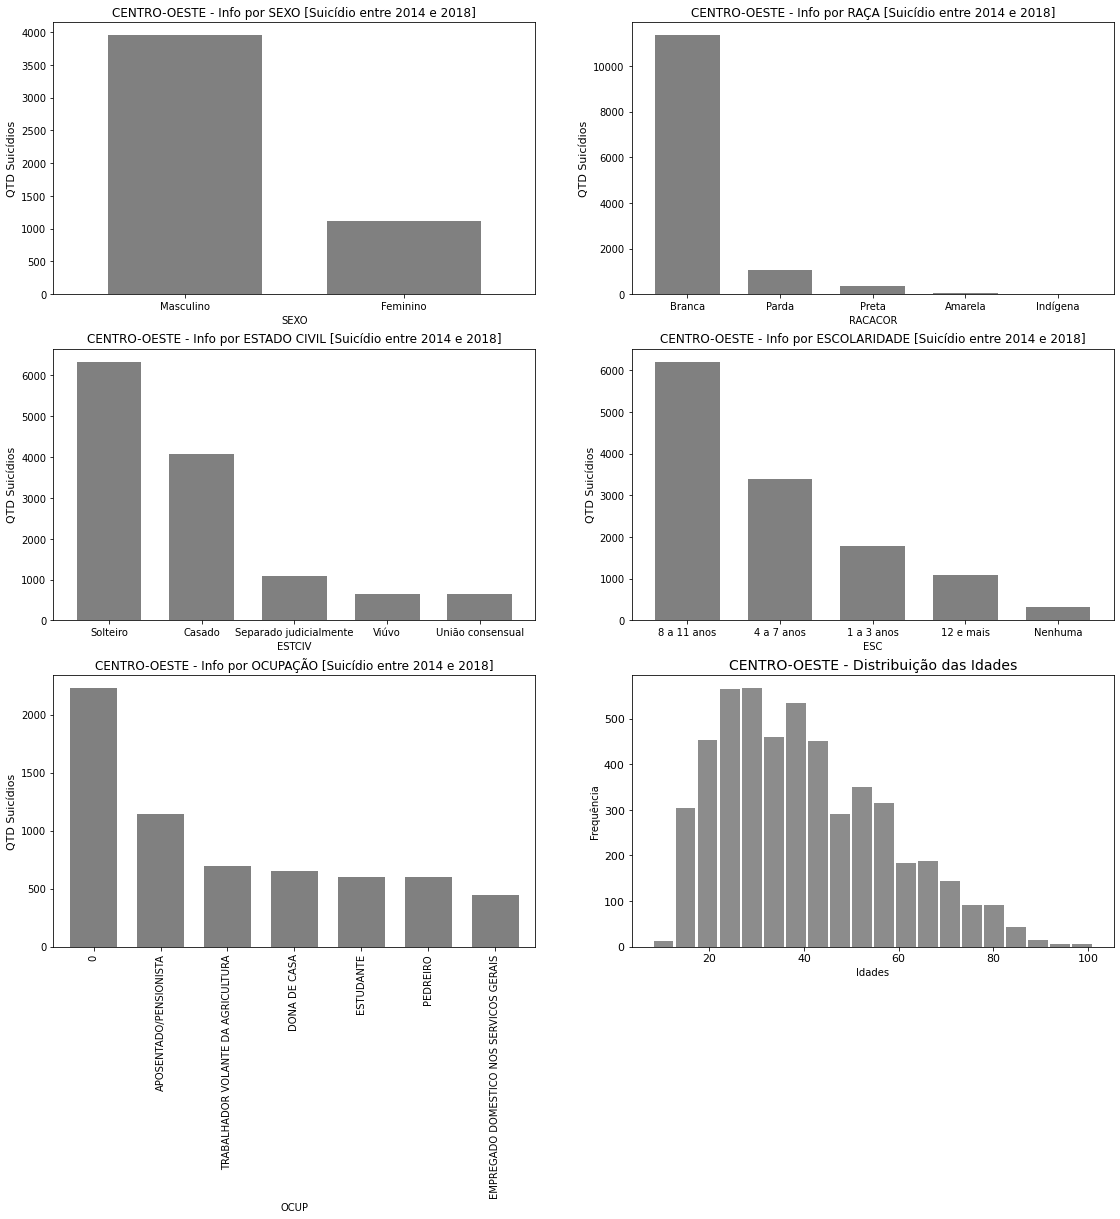

In [169]:
fig, ax = plt.subplots(figsize=(19, 17))

plt.subplot(321)
suic_centro_oeste_sexo.plot.bar('SEXO', width = 0.7, linewidth = 11, color='gray')
plt.xticks(rotation=0)
plt.ylabel('QTD Suicídios', fontsize = 11)
plt.title('CENTRO-OESTE - Info por SEXO [Suicídio entre 2014 e 2018]', fontsize = 12)

plt.subplot(322)
suic_centro_oeste_raca.plot.bar('RACACOR', width = 0.7, linewidth = 11, color='gray')
plt.xticks(rotation=0)
plt.ylabel('QTD Suicídios', fontsize = 11)
plt.title('CENTRO-OESTE - Info por RAÇA [Suicídio entre 2014 e 2018]', fontsize = 12)

plt.subplot(323)
suic_centro_oeste_estciv.plot.bar('ESTCIV', width = 0.7, linewidth = 11, color='gray')
plt.xticks(rotation=0)
plt.ylabel('QTD Suicídios', fontsize = 11)
plt.title('CENTRO-OESTE - Info por ESTADO CIVIL [Suicídio entre 2014 e 2018]', fontsize = 12)

plt.subplot(324)
suic_centro_oeste_esc.plot.bar('ESC', width = 0.7, linewidth = 11, color='gray')
plt.xticks(rotation=0)
plt.ylabel('QTD Suicídios', fontsize = 11)
plt.title('CENTRO-OESTE - Info por ESCOLARIDADE [Suicídio entre 2014 e 2018]', fontsize = 12)

plt.subplot(325)
suic_centro_oeste_ocup.plot.bar('OCUP', width = 0.7, linewidth = 11, color='gray')
plt.xticks(rotation=90)
plt.ylabel('QTD Suicídios', fontsize = 11)
plt.title('CENTRO-OESTE - Info por OCUPAÇÃO [Suicídio entre 2014 e 2018]', fontsize = 12)

plt.subplot(326)
plt.hist(suic_centro_oeste['idade'], bins=20, rwidth=0.9, color='gray', alpha=0.9)
plt.title('CENTRO-OESTE - Distribuição das Idades', fontsize=14)
plt.xlabel('Idades')
plt.ylabel('Frequência')
plt.tick_params(labelsize=11)

plt.show();

#### NORTE

In [165]:
suic_norte_sexo = suic_norte.groupby('SEXO')['CIRCOBITO'].size().sort_values(ascending = False)
suic_norte_raca = suic_norte.groupby('RACACOR')['CIRCOBITO'].size().sort_values(ascending = False)
suic_norte_estciv = suic_norte.groupby('ESTCIV')['CIRCOBITO'].size().sort_values(ascending = False)
suic_norte_esc = suic_norte.groupby('ESC')['CIRCOBITO'].size().sort_values(ascending = False)
suic_norte_ocup = suic_norte.groupby('OCUP')['CIRCOBITO'].size().sort_values(ascending = False).head(7)

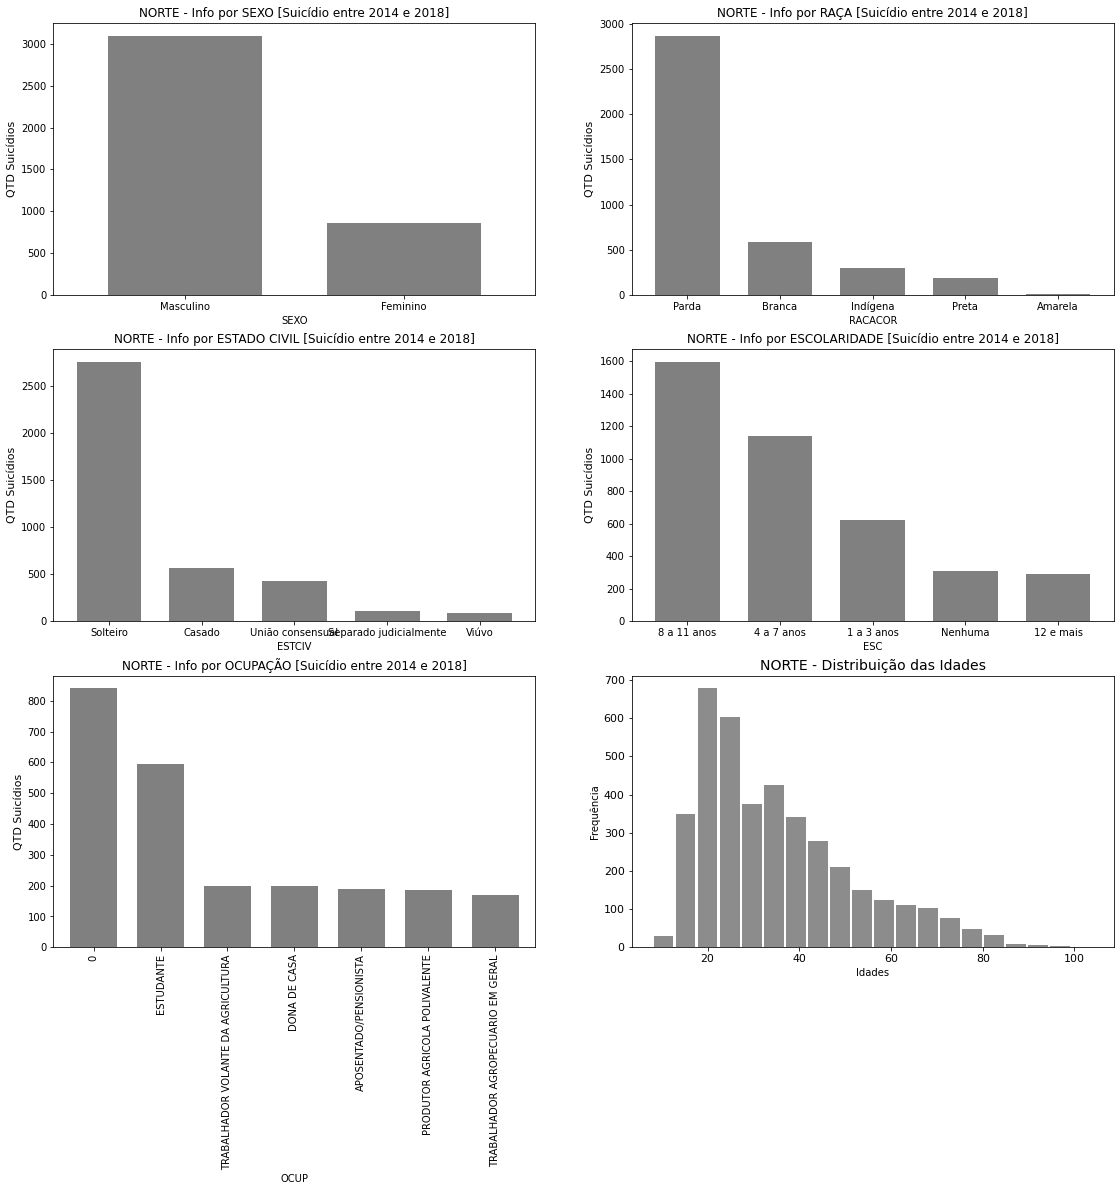

In [170]:
fig, ax = plt.subplots(figsize=(19, 17))

plt.subplot(321)
suic_norte_sexo.plot.bar('SEXO', width = 0.7, linewidth = 11, color='gray')
plt.xticks(rotation=0)
plt.ylabel('QTD Suicídios', fontsize = 11)
plt.title('NORTE - Info por SEXO [Suicídio entre 2014 e 2018]', fontsize = 12)

plt.subplot(322)
suic_norte_raca.plot.bar('RACACOR', width = 0.7, linewidth = 11, color='gray')
plt.xticks(rotation=0)
plt.ylabel('QTD Suicídios', fontsize = 11)
plt.title('NORTE - Info por RAÇA [Suicídio entre 2014 e 2018]', fontsize = 12)

plt.subplot(323)
suic_norte_estciv.plot.bar('ESTCIV', width = 0.7, linewidth = 11, color='gray')
plt.xticks(rotation=0)
plt.ylabel('QTD Suicídios', fontsize = 11)
plt.title('NORTE - Info por ESTADO CIVIL [Suicídio entre 2014 e 2018]', fontsize = 12)

plt.subplot(324)
suic_norte_esc.plot.bar('ESC', width = 0.7, linewidth = 11, color='gray')
plt.xticks(rotation=0)
plt.ylabel('QTD Suicídios', fontsize = 11)
plt.title('NORTE - Info por ESCOLARIDADE [Suicídio entre 2014 e 2018]', fontsize = 12)

plt.subplot(325)
suic_norte_ocup.plot.bar('OCUP', width = 0.7, linewidth = 11, color='gray')
plt.xticks(rotation=90)
plt.ylabel('QTD Suicídios', fontsize = 11)
plt.title('NORTE - Info por OCUPAÇÃO [Suicídio entre 2014 e 2018]', fontsize = 12)

plt.subplot(326)
plt.hist(suic_norte['idade'], bins=20, rwidth=0.9, color='gray', alpha=0.9)
plt.title('NORTE - Distribuição das Idades', fontsize=14)
plt.xlabel('Idades')
plt.ylabel('Frequência')
plt.tick_params(labelsize=11)

plt.show();

### Comparativo de Frequência de Idades nas Regiões

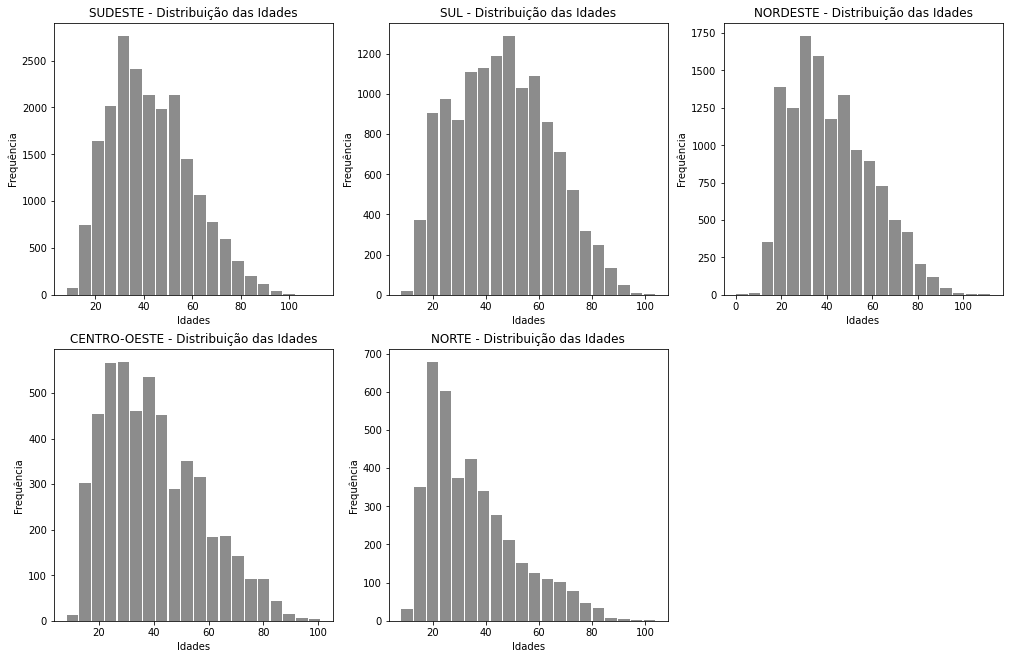

In [133]:
figura = plt.figure(figsize=(17, 11))

figura.add_subplot(2, 3, 1)
plt.hist(suic_sudeste['idade'], bins=20, rwidth=0.9, color='gray', alpha=0.9)
plt.title('SUDESTE - Distribuição das Idades', fontsize=12)
plt.xlabel('Idades')
plt.ylabel('Frequência')
plt.tick_params(labelsize=10)

figura.add_subplot(2, 3, 2)
plt.hist(suic_sul['idade'], bins=20, rwidth=0.9, color='gray', alpha=0.9)
plt.title('SUL - Distribuição das Idades', fontsize=12)
plt.xlabel('Idades')
plt.ylabel('Frequência')
plt.tick_params(labelsize=10)

figura.add_subplot(2, 3, 3)
plt.hist(suic_nordeste['idade'], bins=20, rwidth=0.9, color='gray', alpha=0.9)
plt.title('NORDESTE - Distribuição das Idades', fontsize=12)
plt.xlabel('Idades')
plt.ylabel('Frequência')
plt.tick_params(labelsize=10)

figura.add_subplot(2, 3, 4)
plt.hist(suic_centro_oeste['idade'], bins=20, rwidth=0.9, color='gray', alpha=0.9)
plt.title('CENTRO-OESTE - Distribuição das Idades', fontsize=12)
plt.xlabel('Idades')
plt.ylabel('Frequência')
plt.tick_params(labelsize=10)

figura.add_subplot(2, 3, 5)
plt.hist(suic_norte['idade'], bins=20, rwidth=0.9, color='gray', alpha=0.9)
plt.title('NORTE - Distribuição das Idades', fontsize=12)
plt.xlabel('Idades')
plt.ylabel('Frequência')
plt.tick_params(labelsize=10);

### Evolução anual das ocorrências

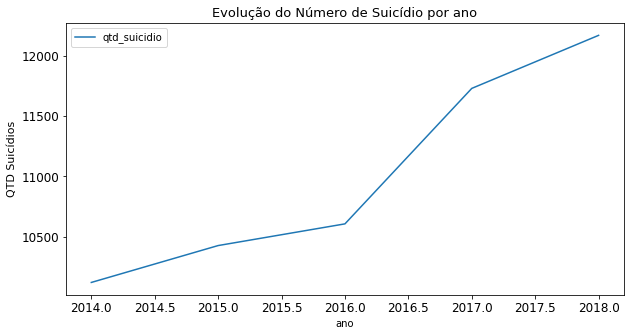

In [144]:
suic_ano.plot(figsize=(10, 5))
plt.title('Evolução do Número de Suicídio por ano', fontsize = 13)
plt.ylabel('QTD Suicídios', fontsize = 11)
plt.tick_params(labelsize=12);